# **BLOC 3: Second Assigment (Frozen Lake) **

**a)** Create an agent that is able to win in the Frozen Lake game, but with the optimal path. This means, the path with the smaller number of steps. Compare the results when training the Q-table and the Q-network. Explain why one is better than the other.


# Introduction:

Now, we will consider the Frozen Lake game, in the lectures of Machine Learning we have studied a code that solves the game, but know we will try to improve that code by solving the game using the optimal path, which means the path with less steps. 

The main idea for implementing that will be to introduce a negative reward each time the agent makes a step so to get the maximum reward the smaller number of steps should be done since if not the reward will decrease. Also, to avoid that the agent preferes to fall insted of reaching the goal destination for avoiding having the negative reward, we will input an extra reward of +10 if it reaches the goal. 

The code will be structered as it follow, the first part will correspond to the design of the game and where the holes are (this code is the same that it was done in class), then Case 1 where the game will be solved using a Q-table and Case-2 where the game will be solve using a Q-network. 

**Design of the game:**

In [0]:
!pip install gym
import gym

    100% |████████████████████████████████| 1.5MB 14.2MB/s 
    100% |████████████████████████████████| 1.0MB 19.6MB/s 
  Running setup.py bdist_wheel for gym ... - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/6c/3a/0e/b86dee98876bb56cdb482cc1f72201035e46d1baf69d10d028
Successfully built gym


In [0]:
env = gym.make('FrozenLake-v0')
env.render()


SFFF
FHFH
FFFH
HFFG


/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [0]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
%matplotlib inline

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 21,
        }

# This function will help us to get nice plots
def plot_matrix(one_hot):
  ''' Reshapes one_hot vector to 4x4 matrix and plots results'''
  matt = np.zeros([4,4])
  for x in range(4):
    for y in range(4):      
      matt[x,y] = one_hot[x+4*y]
   
  plt.xticks([0.5,1.5,2.5,3.5], ('0','1','2','3'))
  plt.yticks([0.5,1.5,2.5,3.5], ('0','1','2','3'))
  
  plt.text(3, 3, "G", size=20, rotation=0,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   ec=(1.,0, 0),
                   fc=(0, 0.82, 1),
                   )
         )
  plt.text(0, 0, "S", size=20, rotation=0,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   ec=(0.8, 0.82, 0),
                   fc=(0.8, 0.82, 0),
                   )
         )  
  plt.imshow(matt)
  
  return matt

In [0]:
size_env = env.observation_space.n
environment = np.zeros(size_env)
reward = np.zeros(size_env)

for i in range(200):
  
    # Reset environment and get first new observation
    s = env.reset()
    d = False
    j = 0
    while j < 99:
        j+=1
        
        # Choose an random action
        a = np.argmax(np.random.randn(1,env.action_space.n))
        
        # Make the environment do a step given the action a        
        s1,r,d,_ = env.step(a)
        
        # Let's store the reward receive for each state s1
        reward[s1] = 3*r
        # d = Done if we fall or win, False in any other case
        if d == False:
          environment[s1] = 1
              
        s = s1
        if d == True:
            break

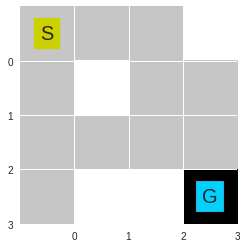

In [0]:
sys_mat = plot_matrix(environment+reward)

Now our setup is created, and we've just seen the distrubution of holes for our game. 

## Case 1: Q-table algorithm

In [0]:
def Q_table(num_episodes, alpha, gamma):
  
  # Initialize Q table with all zeros
  Q = np.zeros([env.observation_space.n,env.action_space.n])
  # We create a  two lists: first saves number of steps per episode, second one 
  # reward obtained per episode
  jList = []
  rList = []
  
  
  for i in range(num_episodes):
      # Reset environment and initialize all variables
      s = env.reset()
      r = 0
      #we introduce an extra variable that will save the negative reward given for each extra step
      reward= 0
      d = False
      j = 0
      # The Q-Table learning algorithm
      while j < 99:
          j+=1
          #Choose an action by greedily (with noise) picking from Q table. This
          # implementation is analogous to the one used in the previous session
          a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
          #Get new state and reward from environment
          s1,r,d,_ = env.step(a)
          #Update Q-Table with new knowledge
          Q[s,a] = Q[s,a] + alpha*(reward + gamma*np.max(Q[s1,:]) - Q[s,a])
          
          
          s = s1
          #d is equal to True in two cases: when game is won or when it falls into a hole
          if d == True:
            #it arrives to the goal position
            if s1==15:
              #print('Win!',i)
              reward += 10  
            #falls in a hole  
            else:
              reward +=-5
            break
          #does an step but either of the last situations happen (negative reward)
          else: 
              reward += -1
      jList.append(j)
      rList.append(reward)

      
  return Q, jList, rList

In [0]:
# Set learning and discount factor parameters
alpha = .8
gamma = .95
# Runs of the algorithm and episodes of each run
runs = 50
num_episodes = 500

steps = []
rewards = []
for ii in tqdm(range(runs)):
  
  Q, jList, rList = Q_table(num_episodes, alpha, gamma)
  
  steps.append(jList)
  rewards.append(rList)

100%|██████████| 50/50 [00:03<00:00, 12.59it/s]


Text(0.5,1,'Number of steps')

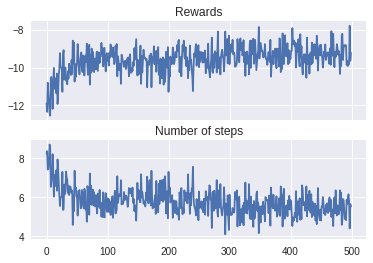

In [0]:
steps_t = np.sum(steps, 0)/runs
rewards_t = np.sum(rewards, 0)/runs

f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(rewards_t)
axarr[0].set_title('Rewards')
axarr[1].plot(steps_t)
axarr[1].set_title('Number of steps')

If we look at the last two graphs, we can notice how during the first steps the reward is very negative, the reason for that would be that in the first attemps it would make a lot of steps of fall quickly to one hole. After some episodes, we can se how the reward increases and stays more or less constrant. On the other hand, if the look at the grahp where it shown the number of steps, we can realise that at the end the number of steps oscillates between 5 and 6 that whould correspond to the minimum number of steps, and therefor to the optimal path.

## Case 2: Q-Network

In the previous example, we have used a very small system, in which the size of the Q matrix was 16x16. However, what happens when we work with much complex systems, where the number of possible states and actions is to big to be stored in a matrix? This also applys to continuous systems, where the number of states is virtually infinite. The go to solution in these cases is to use a Neural Network instead of a matrix.

Let's construct a very simple NN

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


class QNAgent:
  def _Neural_Network(self):
      # Neural Net for Deep-Q learning Model
      model = Sequential()
      model.add(Dense(24, input_dim=self.state_size, activation='relu'))
      model.add(Dense(24, activation='relu'))
      model.add(Dense(self.action_size, activation='linear'))
      model.compile(loss='mse',
                    optimizer=Adam(lr=self.learning_rate))
      return model

Using TensorFlow backend.


As you saw in previous classes on NN (?), it is more efficient to train on batches than with single samples. To take this into account in our RL problem, we will create an agent that is able to *remember* and *replay* over its memory to train a NN! For remembering, things are easy:

In [0]:
class QNAgent(QNAgent):
  def remember(self, state, action, reward, next_state, done):
    self.memory.append((state, action, reward, next_state, done))

Replaying is the crucial part of our agent, as it is where the training of NN occurs. The NN is trained to minimize the following loss functions:

$$\mbox{loss}=(\underbrace{r_t+\gamma \max_{a'}Q(s_{t+1},a_{t+1}')}_{target}-\underbrace{Q(s_t,a_t)}_{prediction})$$

In [0]:
class QNAgent(QNAgent):  
  def replay(self, batch_size):
    # We create a batch of memory
    batch = random.sample(self.memory, batch_size)
    # For each sample in the memory
    for state, action, reward, next_state, done in batch:
      
        # Let's construct the reward:
        # if the game has ended, we know exactly what if it ended in a good or
        # bad way. Then the target will be exactly the reward
        target = reward
        # if we have not ended, we will take the reward (as we did not end, it 
        # zero) plus the argmax value of a prediction of the all possible next 
        # states. This ensure that intermediate state have an increasing value 
        # function.
        if not done: 
            target = (reward + self.gamma *
                      np.amax(self.model.predict(next_state)[0]))
            
        # Now we create a vector, by means of the model, which gives a 
        # prediction of the value of Q for each possible action given the 
        # current state.
        target_f = self.model.predict(state)
        # Then, we substitue the value of the action taken by the target. This 
        # effectively implements the loss function.
        target_f[0][action] = target
        
        # Then, we train the model
        self.model.fit(state, target_f, epochs=1, verbose=0)
        
    # Finally, we decrease the value of the greedy election    
    if self.epsilon > self.epsilon_min:
        self.epsilon *= self.epsilon_decay

As last step, we need the agent to have the capability of acting!

In [0]:
class QNAgent(QNAgent):
  def act(self, state):
    # The agent has the capability of doing a greedy action
    if np.random.rand() <= self.epsilon:
        return random.randrange(self.action_size)
      
    # Or an action taken from the model
    act_values = self.model.predict(state)
    return np.argmax(act_values[0])    

Finally, let's set the parameters of the learning procedure.

In [0]:
from collections import deque
import random
class QNAgent(QNAgent):
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._Neural_Network()

Let's now create the Q-network algorithm:

In [0]:
def Q_network(env, agent, num_episodes, batch_size):

  steps = []
  rewards = []
  states = []
  reward_count = 0
  done = False
  
  for e in tqdm(range(num_episodes)):
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    
    j = 0
    reward_count = 0 #new variable that will save the negative reward and the extra reward for winning
    # The Q-Network learning algorithm
    while j < 99:
      j+=1

      action = agent.act(state)
      next_state, reward, done, _ = env.step(action)    
      next_state = np.reshape(next_state, [1, state_size])
      agent.remember(state, action, reward, next_state, done)
      state = next_state    


      if done:
      #it arrives to the goal position
        if s1==15:
        #print('Win!',i)
          reward_count += 10  
        #falls in a hole  
        else:
          reward_count +=-5
          break
        #does an step but either of the last situations happen
      else: 
        reward_count += -1
       

    rewards.append(reward_count)
    steps.append(j)
    if len(agent.memory) > batch_size:
      agent.replay(batch_size)
  
  return rewards, steps

In [0]:
# Parameters of the environment
env = gym.make('FrozenLake-v0')
runs = 10
num_episodes = 500

# Parameters for the agent
state_size = 1 # size of the state vector
action_size = env.action_space.n
batch_size = 32

# We will run the progam runs times to average over many played games
rew_run = []
step_run = []
for runs in range(runs):
  
  agent = QNAgent(state_size, action_size)
  
  rewards, steps = Q_network(env, agent, num_episodes, batch_size)
  
  rew_run.append(rewards)
  step_run.append(steps)

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|██████████| 500/500 [00:36<00:00, 13.84it/s]


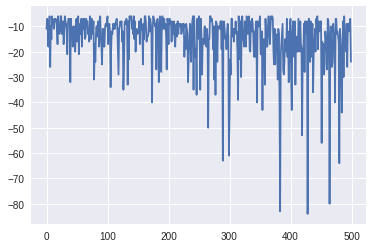

In [0]:
plt.plot(rew_run[0])

Doing the same procedure for a Q-network, we obtain that the reward after 500 episodes instead of becoming less negative it becomes more negative. That would mean that the agent is not learning the optimal path as quickly as in the Q-table and after 500 episodes the optimal path hasn't been found. 

# Comparison of the two methods:

It seems that it works isn't it? However, let's compare it in the first 500 episodes with the Q-table:

Text(0.5,1,'Q-network')

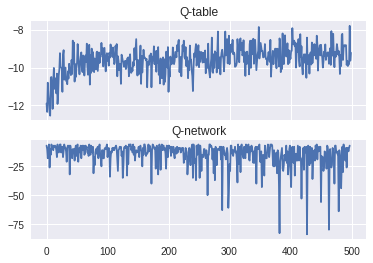

In [0]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(rewards_t)
axarr[0].set_title('Q-table')
axarr[1].plot(rew_run[0][1:499])
axarr[1].set_title('Q-network')


# **Results**

As we have commented previously, the Q-network obtains a more negative reward after the same number of episodes. Which would mean that using both methods to solve the problem and find the optimal path, the Q-table has succefully reach the minimal path quicker than the Q-network. 
